# Advance Numpy

**Numpy Array vs Python List**

*We will do comparison on the basis of speed , memory and convenience*

In [2]:
# Speed
#********** List**************
import time

a = [i for i in range(1000000)]
b = [i for i in range(1000000,2000000)]
c=[]

start = time.time() # note current time

for i in range(len(a)):
  c.append(a[i]+b[i])

print(time.time()-start) # it calculates the time for loop


0.20666217803955078


In [3]:
# Speed
#************** Array *******************
import numpy as np
import time

start = time.time()

m = np.arange(1000000)
n = np.arange(1000000,2000000)

c= m+n

print(time.time()- start)

0.01851654052734375


In [4]:
# memory
import sys
a = [i for i in range(1000000)]
sys.getsizeof(a)

8448728

In [5]:
# memory
import numpy as np
m = np.arange(10000000,dtype= np.int32)
sys.getsizeof(m)

40000112

**Advance Indexing**

In [7]:
# fancy indexing
a = np.arange(24).reshape(6,4)
a
a[[1,2]],   # row 1st and 2nd
a[[1,4,3]]  # 1st 4th 3rd

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19],
       [12, 13, 14, 15]])

In [8]:
# Q1) i need first row, 3rd row, 4th row and last row from a matrix
print(a[[0,2,3,5]])

# Q2) i need first,2nd and last COLUMNS from a matrix
print(a[:,[0,1,3]])

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]]
[[ 0  1  3]
 [ 4  5  7]
 [ 8  9 11]
 [12 13 15]
 [16 17 19]
 [20 21 23]]


In [10]:
# Boolean Indexing
import numpy as np
b = np.random.randint(1,100,24).reshape(6,4)
b[b>65]

array([66, 85, 98, 80, 70, 89, 81])

In [11]:
# Boolean indexing
b[b>50]

array([54, 64, 66, 85, 53, 54, 98, 80, 70, 89, 81])

In [20]:
#find all number greater the 50 and even
x = np.random.randint(1,100,16).reshape(4,4)
x

array([[51, 26, 62, 91],
       [96, 98, 69,  2],
       [87, 29, 72, 45],
       [ 9,  9, 84,  6]])

In [21]:
x[(x%2==0) & (x>50)]

array([62, 96, 98, 72, 84])

In [ ]:
# find all number not divisible by 7
y = np.random.randint(1,50,16).reshape(4,4)
y[~(y%7==0)]

array([47, 43, 13, 15, 41, 27,  5, 19, 40, 12, 30, 36, 39, 15, 39])

***Broadcasting**

The term broadcasting describes how Numpy treats arrays with diff shapes during arithmatic operations.

The smaller array is "broadcast" across the larger array so that they have compatible shapes*

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [4]:
# Why broadcasting

# question why these 2 different dimension of array perform + operation
# (in matrix this operation can't be done array must have same dim(mxn))

a = np.arange(10).reshape(2,5)
b = np.arange(5)
print(a)
print(b)

a+b

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]


array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [6]:
import numpy as np

# Broadcasting error
a = np.arange(10).reshape(2,5)
b = np.arange(4)
print(a)
print(b)

# a+b  #! error

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3]


In [7]:
# Example 1

a = np.arange(12).reshape(4,3)
b = np.arange(3)

a+b  # TRUE

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

In [8]:
# Example 2

a = np.arange(12).reshape(3,4)
b = np.arange(3)

# a+b  # False

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [11]:
# Example 3

a = np.arange(3).reshape(1,3)   # (1,3) ---> (4,3)  1 streched to 4
b = np.arange(4).reshape(4,1)   # (4,1) ---> (4,3)  1 streched to 3

a+b # True

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [13]:
# Example 4
a = np.array([1])  # shape(1,1)

b = np.arange(4).reshape(2,2)   # shape(2,2)

print(a)
print(b)

a+b # True

[1]
[[0 1]
 [2 3]]


array([[1, 2],
       [3, 4]])

In [14]:
# Example 5

a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)


a+b  # false

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

**Working with mathematical formulas**

In [15]:
a = np.arange(10)
np.sum(a)

45

In [16]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [18]:
# Sigmoid Function

def sigmoid(array):
  return (1/(1+np.exp(-(array))))


a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [22]:
# Mean Square error  ( Loss funtion)

def mse(actual, predicted):
  return np.mean((actual - predicted)**2)


actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

mse(actual, predicted)


468.4

In [ ]:
# Binary cross Entropy

def bce(y,p):
  return np.mean(-(y*np.log(p)+ (1-y)*np.log(1-p)))/n



In [23]:
# Working with missing value
a = np.array([1,2,3,4,np.nan, 5,6])   # np.nan = missing value
a

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [24]:
np.isnan(a)

array([False, False, False, False,  True, False, False])

In [25]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 5., 6.])

**Graph Plotting**

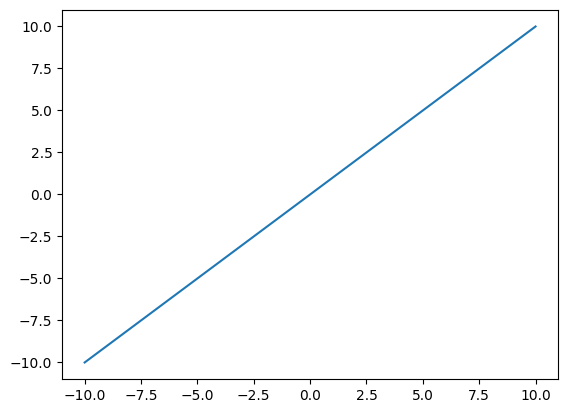

In [30]:
# plotting a 2D plot

import matplotlib.pyplot as plt

# x=y


x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

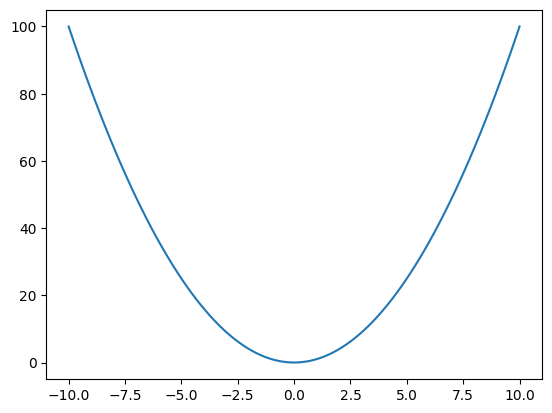

In [36]:
# y = x^2

x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)


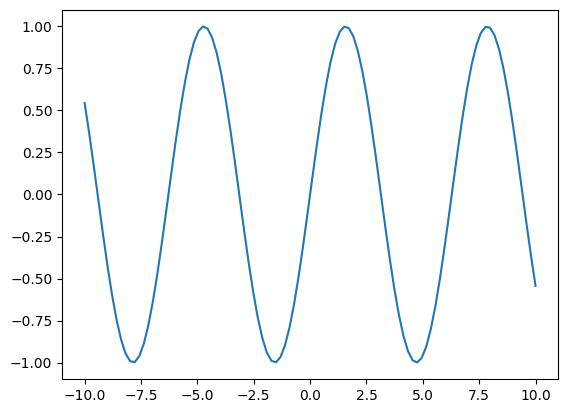

In [38]:
# sinx graph

x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-47-aac8fb4d3e87>:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


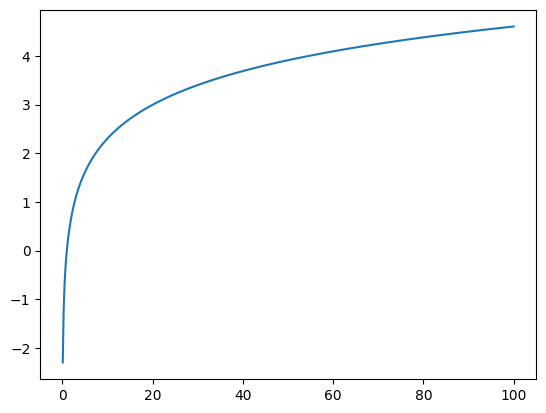

In [47]:
# Logx

x = np.linspace(-100,100,1000)
y = np.log(x)

plt.plot(x,y)

<ipython-input-48-b9904b7cd21f>:4: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x)


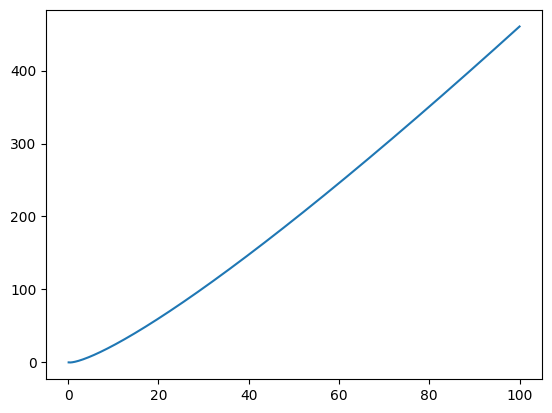

In [48]:
# xlog(x)

x = np.linspace(-100,100,1000)
y = x*np.log(x)

plt.plot(x,y)

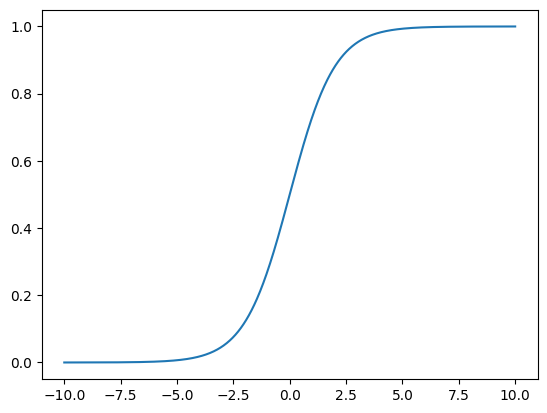

In [49]:
# sigmoid function


x = np.linspace(-10,10,1000)
y = 1/(1+ np.exp(-(x)))

plt.plot(x,y)